In [113]:
# Import packages
import pandas as pd 
import seaborn as sns
import numpy as np 
import pickle as pkl
import matplotlib.pyplot as plt 

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

%matplotlib inline 

## 2. Data Understanding

In [52]:
# load dataset
wine = pd.read_csv('../data/external/winequalityN.csv')

In [53]:
# Описание значений
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [54]:
# Описание показателей
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [55]:
# Смотрим пропуски
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [56]:
# Смотрим данные
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Графики соотношения параметров к quality

<Axes: xlabel='quality', ylabel='fixed acidity'>

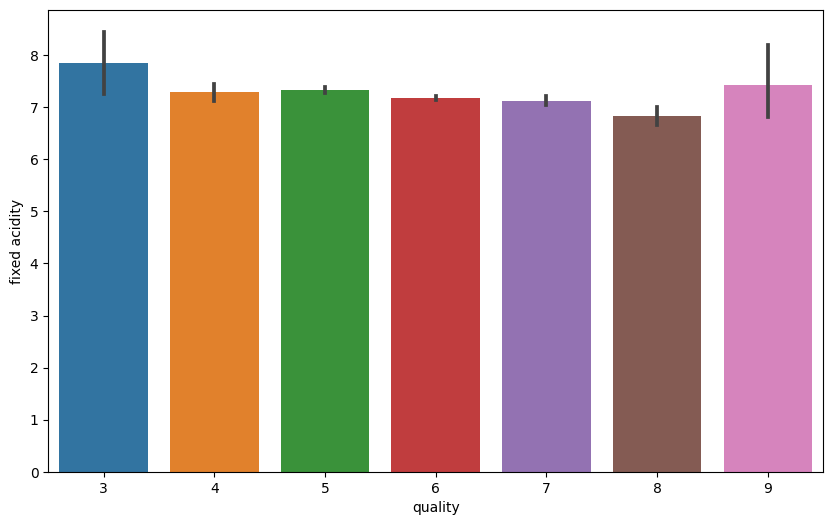

In [57]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

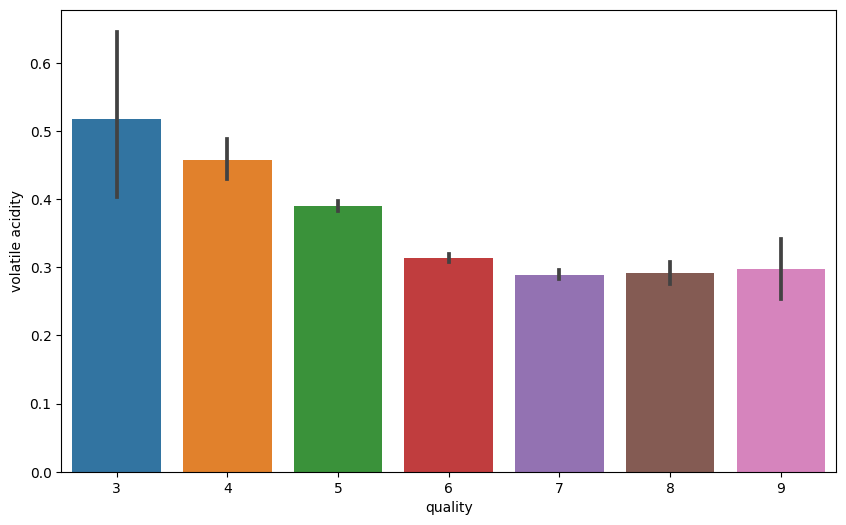

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

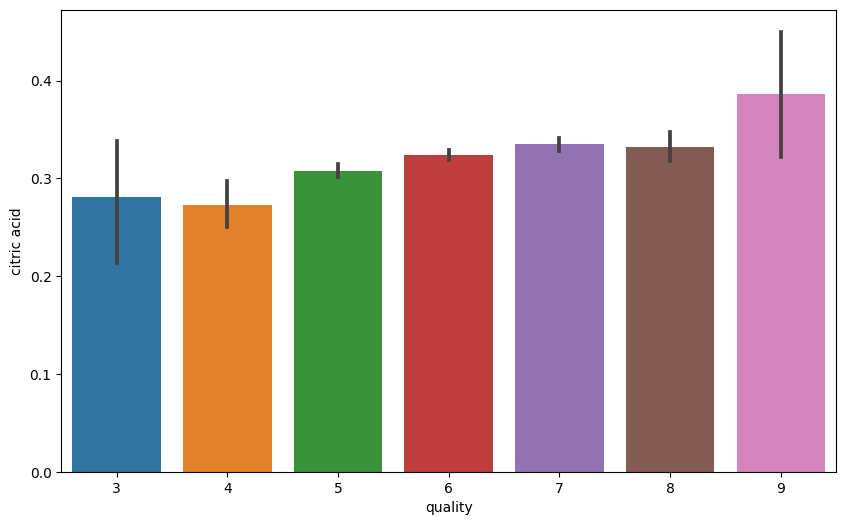

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

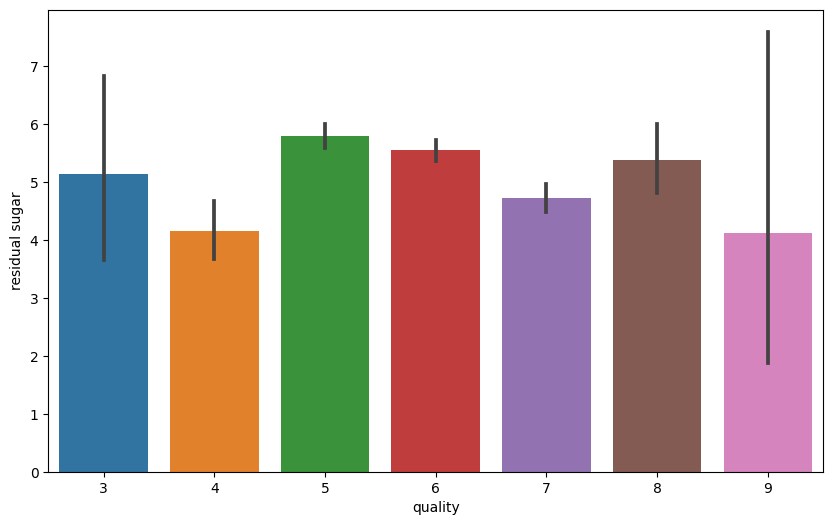

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<Axes: xlabel='quality', ylabel='chlorides'>

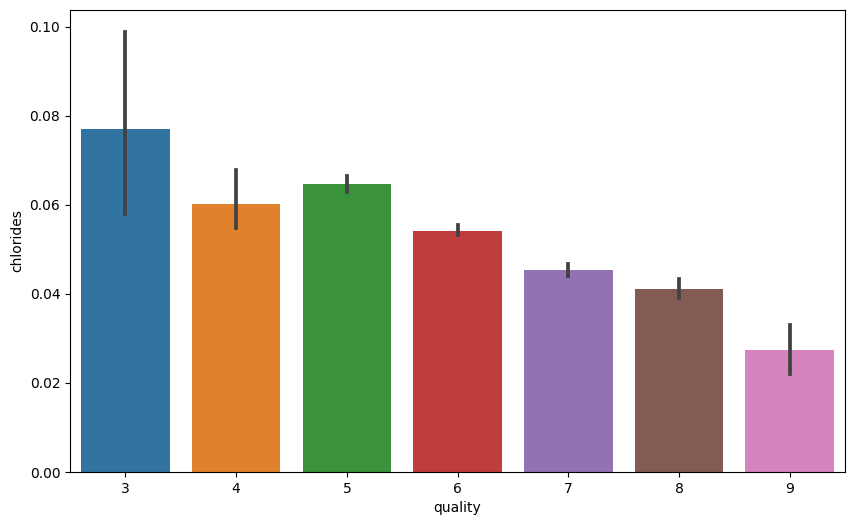

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

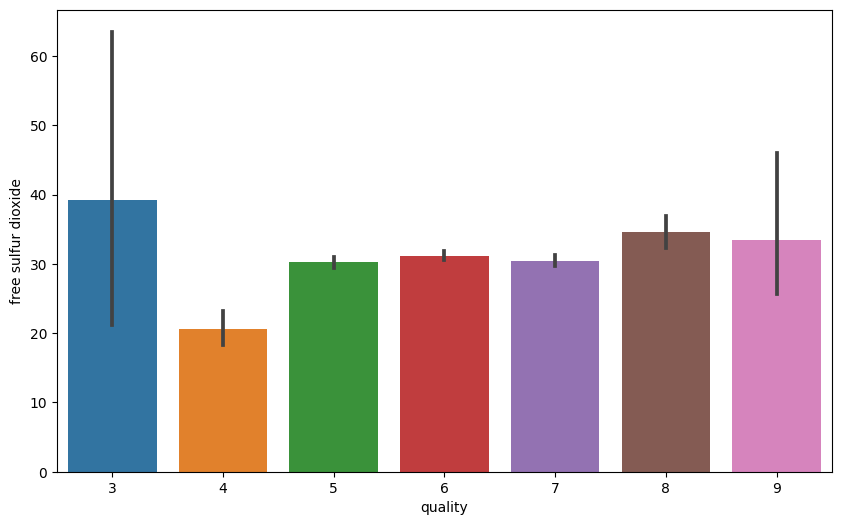

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

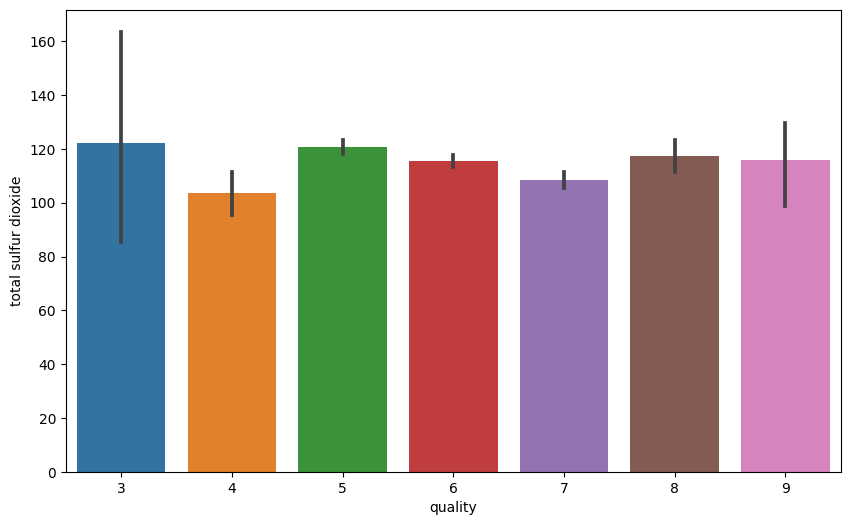

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='sulphates'>

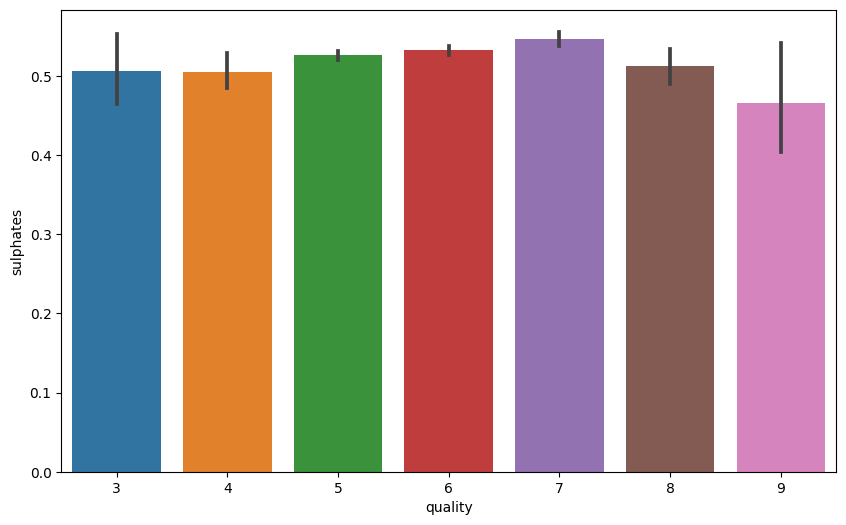

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

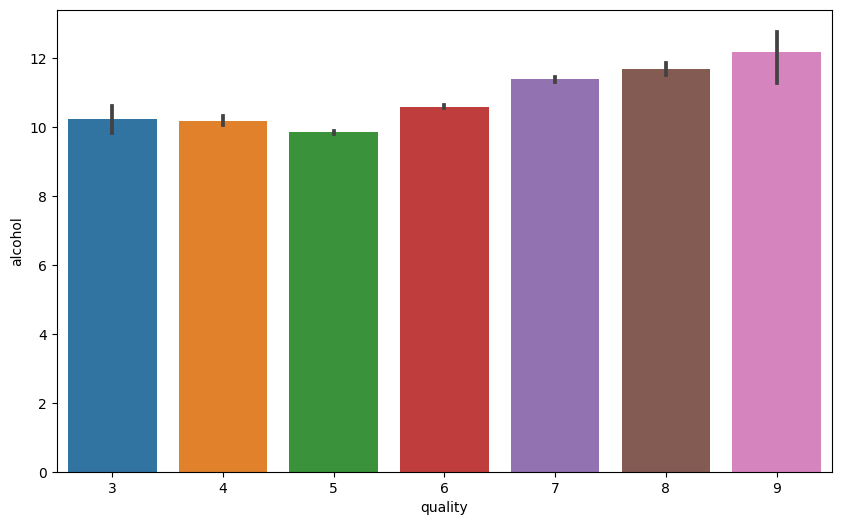

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## 3. Data Preprocessing

In [58]:
# Чистим пропуски - 34 строки
wine = wine.dropna()

In [59]:
# Приводим все к категориальной переменной
bins = (0, 6.5, 8)  
group_names = ['bad', 'good'] 
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

['bad', 'good', NaN]
Categories (2, object): ['bad' < 'good']

In [60]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality']) # Привоодим к OneHotEncoding: bad -> 0, good -> 1

In [61]:
wine.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,0


In [78]:
# Трансформируем из dataFrame в array numpy
X = wine.drop('quality', axis=1).drop('type', axis=1).values
y = wine['quality'].values

In [79]:
# Делим на test - train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
print(f'Training data: X: {X_train.shape} y: {y_train.shape}')
print(f'Test data: X: {X_test.shape} y: {y_test.shape}')

Training data: X: (5170, 11) y: (5170,)
Test data: X: (1293, 11) y: (1293,)


In [81]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

## 4. Modeling and Evaluation - Grid Search with Cross Validation

### Random Forest

In [82]:
RFC_base_classifier = RandomForestClassifier(n_estimators=100) 

In [83]:
# Параметры матрицы
param_RFC = {
    'n_estimators': [100, 120, 140, 160, 180, 200, 230, 260, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 4, 5, 7, 9, 10, 15, 20],
    'bootstrap': [True, False]
}

In [85]:
grid_search_RFC = GridSearchCV(estimator=RFC_base_classifier,
                           param_grid= param_RFC,
                           scoring='accuracy',
                           cv=5,           
                           n_jobs=-1)

In [86]:
grid_search_RFC.fit(X_train, y_train)

/Users/greddyd/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 4, 5, 7, 9, 10, 15, 20],
                         'n_estimators': [100, 120, 140, 160, 180, 200, 230,
                                          260, 300, 500, 800, 1000]},
             scoring='accuracy')

In [87]:
best_result_RFC = grid_search_RFC.best_score_
print(f'Mean cross-validation score of best model: {best_result_RFC}')

Mean cross-validation score of best model: 0.8847195357833655


### Support Vector Machine

In [88]:
SVC_base_classifier = SVC()

param_SVC = {
    'C': [2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 6.5, 7],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto', 0.2, 0.5, 0.6, 0.7, 0.8],
    'degree': [4, 5, 6, 7, 8, 9]
}

In [89]:
grid_search_SVC = GridSearchCV(estimator=SVC_base_classifier,
                           param_grid=param_SVC,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [90]:
grid_search_SVC.fit(X_train, y_train)

/Users/greddyd/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 6.5, 7],
                         'degree': [4, 5, 6, 7, 8, 9],
                         'gamma': ['scale', 'auto', 0.2, 0.5, 0.6, 0.7, 0.8],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [91]:
best_result_SVC = grid_search_SVC.best_score_
print(f'Mean cross-validation score of best model: {best_result_SVC}')

Mean cross-validation score of best model: 0.8731141199226305


### KNN

In [92]:
knn_base_classifier = KNeighborsClassifier(n_neighbors=5)
grid_param_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [93]:
grid_search_knn = GridSearchCV(estimator=knn_base_classifier,
                           param_grid=grid_param_knn,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [94]:
grid_search_knn.fit(X_train, y_train)

/Users/greddyd/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [95]:
best_result_knn = grid_search_knn.best_score_
print(f'Mean cross-validation score of best model: {best_result_knn}')

Mean cross-validation score of best model: 0.8794970986460348


## 5. Evaluation of the optimized models on test data

### Random Forest

In [96]:
RFC = RandomForestClassifier(n_estimators=200, max_depth=None, criterion='gini', bootstrap=True)
RFC.fit(X_train, y_train)
pred_RFC = RFC.predict(X_test)

In [97]:
print(classification_report(y_test, pred_RFC))
confmat_RFC = confusion_matrix(y_test, pred_RFC)

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1022
           1       0.80      0.57      0.67       270
           2       0.00      0.00      0.00         1

    accuracy                           0.88      1293
   macro avg       0.56      0.51      0.53      1293
weighted avg       0.87      0.88      0.87      1293



/Users/greddyd/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/greddyd/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/greddyd/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machine

In [98]:
SVC_clf = SVC(kernel='rbf', C=2, gamma=0.6, degree=4)
SVC_clf.fit(X_train, y_train)
pred_SVC = SVC_clf.predict(X_test)

In [99]:
print(classification_report(y_test, pred_SVC))
confmat_SVC = confusion_matrix(y_test, pred_SVC)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1022
           1       0.71      0.51      0.60       270
           2       0.00      0.00      0.00         1

    accuracy                           0.86      1293
   macro avg       0.53      0.49      0.50      1293
weighted avg       0.84      0.86      0.85      1293



/Users/greddyd/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/greddyd/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/greddyd/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [100]:
knn_clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', weights='distance')
knn_clf.fit(X_train, y_train)
pred_knn = knn_clf.predict(X_test)

In [101]:
print(classification_report(y_test, pred_knn))
confmat_knn = confusion_matrix(y_test, pred_knn)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1022
           1       0.69      0.60      0.64       270
           2       0.00      0.00      0.00         1

    accuracy                           0.86      1293
   macro avg       0.53      0.51      0.52      1293
weighted avg       0.85      0.86      0.86      1293



/Users/greddyd/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/greddyd/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/greddyd/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6. Deployment

In [106]:
# Берем "из головы" данные для првоерки моделей классификации
pH = 3
alcohol = 12
Xnew = [[7.8, 0.22, 0.99, 2.0, 0.01, 9.0, 18.0, 0.9968, pH, 1.8, alcohol]]

In [103]:
Xnew = feature_scaler.transform(Xnew)

In [105]:
ynew_RFC = RFC.predict(Xnew)
ynew_SVC = SVC_clf.predict(Xnew)
ynew_knn = knn_clf.predict(Xnew)

if ynew_RFC==0:
    label_RFC = 'bad'
else:
    label_RFC = 'good'
    
if ynew_SVC==0:
    label_SVC = 'bad'
else:
    label_SVC = 'good'
    
if ynew_knn==0:
    label_knn = 'bad'
else:
    label_knn = 'good'

print('Result of classification: ')
print(f'Random Forest Classifier: Label = {ynew_RFC} --> {label_RFC} wine')
print(f'Support Vector Classifier: Label = {ynew_SVC} --> {label_SVC} wine')
print(f'KNNClassifier: Label = {ynew_knn} --> {label_knn} wine')

Result of classification: 
Random Forest Classifier: Label = [0] --> bad wine
Support Vector Classifier: Label = [0] --> bad wine
KNNClassifier: Label = [0] --> bad wine


## 7. Save train models

In [114]:
path = "../models/"
model_pkl_file_rf = "wine_RF_classifier_model.pkl"
model_pkl_file_svc = "wine_SVC_classifier_model.pkl"  
model_pkl_file_knn = "wine_KNN_classifier_model.pkl"  

with open(path + model_pkl_file_rf, 'wb') as file:  
    pkl.dump(RFC, file)

with open(path + model_pkl_file_svc, 'wb') as file:  
    pkl.dump(SVC_clf, file)

with open(path + model_pkl_file_knn, 'wb') as file:  
    pkl.dump(knn_clf, file)